Imports

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Tratamento inicial dos dados

In [2]:
# leitura do arquivo
df = pd.read_csv("Stock_TLKM_2005-2024.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-26,965.0,975.0,965.0,970.0,548.346130,84725000.0
1,2005-01-27,970.0,970.0,960.0,960.0,542.692932,134222500.0
2,2005-01-28,965.0,965.0,955.0,960.0,542.692932,100760000.0
3,2005-01-31,960.0,965.0,950.0,960.0,542.692932,137322500.0
4,2005-02-01,965.0,975.0,960.0,965.0,545.519531,69960000.0
5,2005-02-02,965.0,970.0,950.0,950.0,537.040039,103680000.0
6,2005-02-03,950.0,955.0,935.0,940.0,531.387024,125185000.0
7,2005-02-04,940.0,945.0,935.0,935.0,528.560364,66002500.0
8,2005-02-07,940.0,945.0,930.0,930.0,525.733948,48097500.0
9,2005-02-08,930.0,930.0,920.0,925.0,522.907166,60667500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4705 non-null   object 
 1   Open       4704 non-null   float64
 2   High       4704 non-null   float64
 3   Low        4704 non-null   float64
 4   Close      4704 non-null   float64
 5   Adj Close  4704 non-null   float64
 6   Volume     4704 non-null   float64
dtypes: float64(6), object(1)
memory usage: 257.4+ KB


In [4]:
# conversão da data para datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4705 non-null   datetime64[ns]
 1   Open       4704 non-null   float64       
 2   High       4704 non-null   float64       
 3   Low        4704 non-null   float64       
 4   Close      4704 non-null   float64       
 5   Adj Close  4704 non-null   float64       
 6   Volume     4704 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 257.4 KB


In [5]:
# vizualização da menor e da maior data
df['Date'].min(), df['Date'].max()

(Timestamp('2005-01-26 00:00:00'), Timestamp('2024-01-30 00:00:00'))

In [8]:
# exclusão de colunas desnecessárias e ordernação por data
cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Date')
df.isnull().sum()

Date     0
Close    1
dtype: int64

In [9]:
# agrupamento por data VERIFICAR SE É NECESSÁRIO
df = df.groupby('Date')['Close'].sum().reset_index()

In [10]:
# define o campo de data como index
df = df.set_index('Date')
df.index

DatetimeIndex(['2005-01-26', '2005-01-27', '2005-01-28', '2005-01-31',
               '2005-02-01', '2005-02-02', '2005-02-03', '2005-02-04',
               '2005-02-07', '2005-02-08',
               ...
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-22',
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
               '2024-01-29', '2024-01-30'],
              dtype='datetime64[ns]', name='Date', length=4705, freq=None)

In [11]:
# organiza as datas por mês
y = df['Close'].resample('MS').mean()

In [12]:
y['2017':]

Date
2017-01-01    3936.818182
2017-02-01    3888.000000
2017-03-01    4018.636364
2017-04-01    4205.555556
2017-05-01    4378.000000
                 ...     
2023-09-01    3742.000000
2023-10-01    3695.909091
2023-11-01    3602.727273
2023-12-01    3928.947368
2024-01-01    3972.380952
Freq: MS, Name: Close, Length: 85, dtype: float64

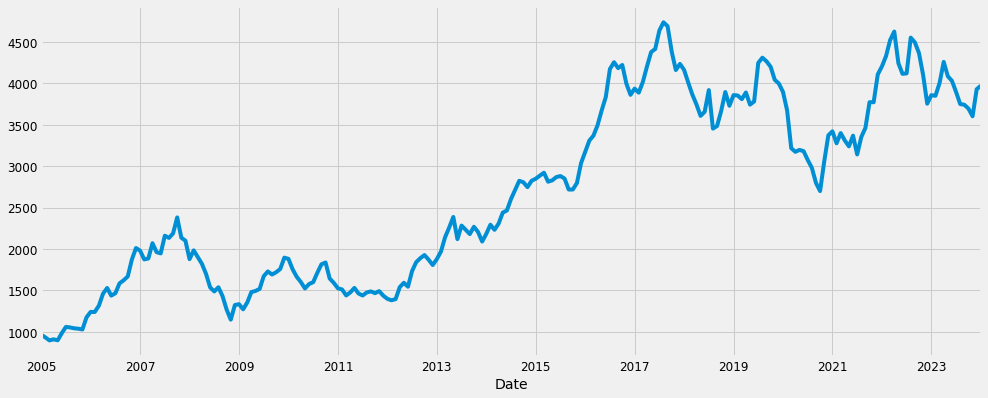

In [13]:
y.plot(figsize=(15, 6))
plt.show()

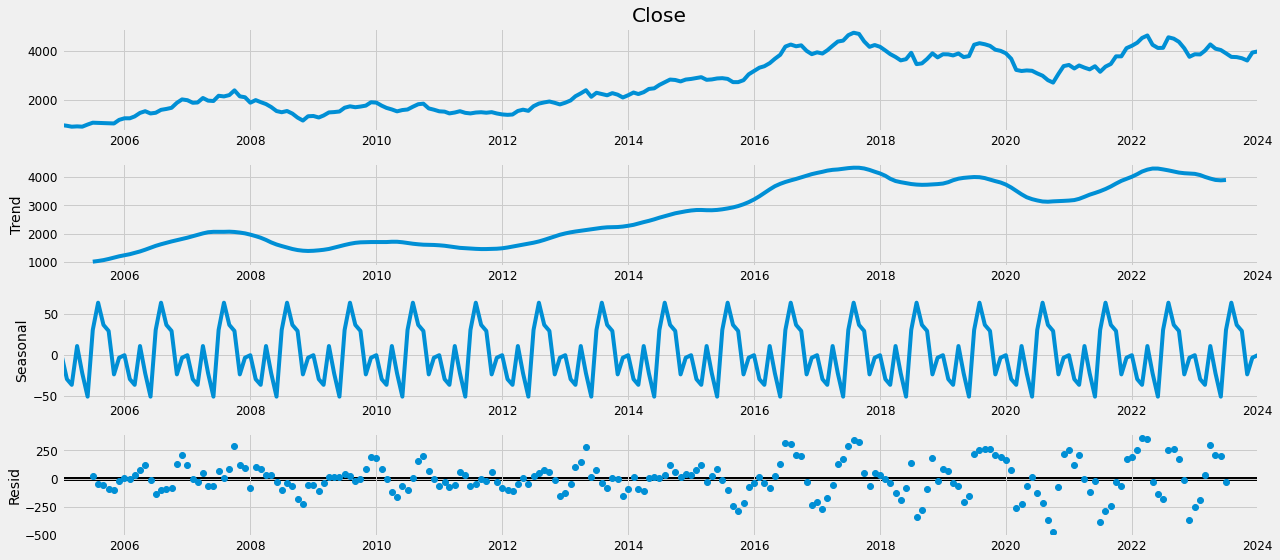

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [26]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4285.845457746103
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3827.808041251284
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3373.4505626834984
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3183.1539763731985
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3386.5571620024702
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3364.581131040164
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3199.408922430988
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3185.0588007254246
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3967.5712448582567
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3542.8574866955505
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3132.931812016047
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2951.9336851153807
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3161.3281131343088


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3144.0429601406095
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2981.6668126808695
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2953.919106300709
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2889.5312223543688
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2748.4819244430746
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2893.8026446092717
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2616.6389646558237
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2760.254120019935
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2750.4785785930744
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2686.6468969100415
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2617.9626165414356
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2870.595887804535
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2729.9517977147816
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2869.04713802639
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2597.861201774018
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2753.7172245296333
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2731.934161747102
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2674.12866330318
A

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2762.4191476982296
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2901.884716458706
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2629.655236139527
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2761.785025775347
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2763.7798854812563
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2683.773242136801
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2631.1869611224956
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2884.018313708767


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2744.509749757888
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2874.2848090555076
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2610.3278221651335
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2755.532133790357
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2745.6847898015308
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2669.4189806718405
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2612.0848063763533
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2882.1862014778494
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2741.8340709507775
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2881.9511158936716
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2609.2520341027757
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2741.8340989240673
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2743.8335955459597
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2662.474905495258
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2610.817153546439
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2872.4130362836904
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2731.769744619287
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2870.93044173095

In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0384      0.232     -0.166      0.868      -0.493       0.416
ma.L1          0.3021      0.233      1.298      0.194      -0.154       0.758
ar.S.L12      -0.5491      0.051    -10.734      0.000      -0.649      -0.449
sigma2      2.901e+04   2531.194     11.461      0.000     2.4e+04     3.4e+04


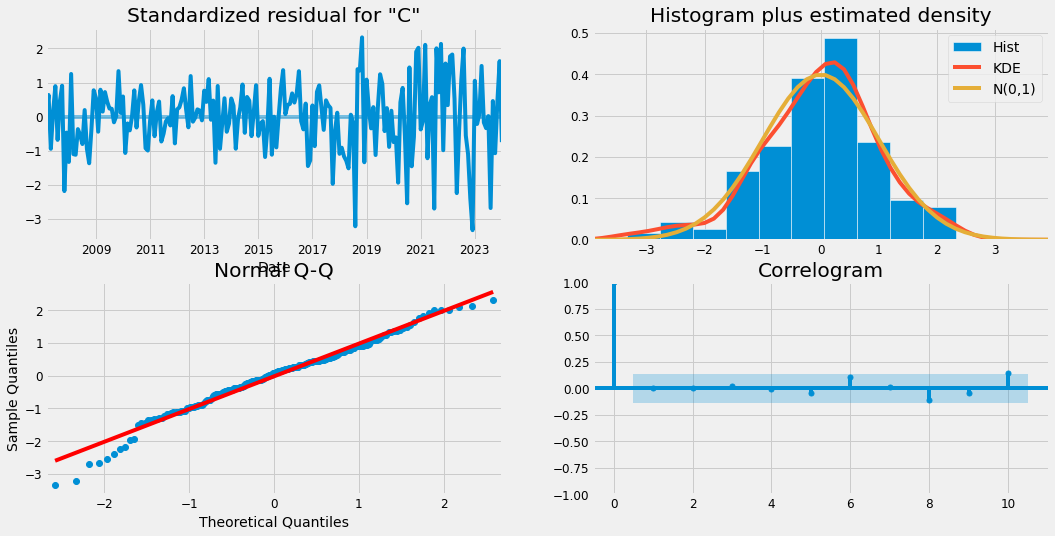

In [17]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

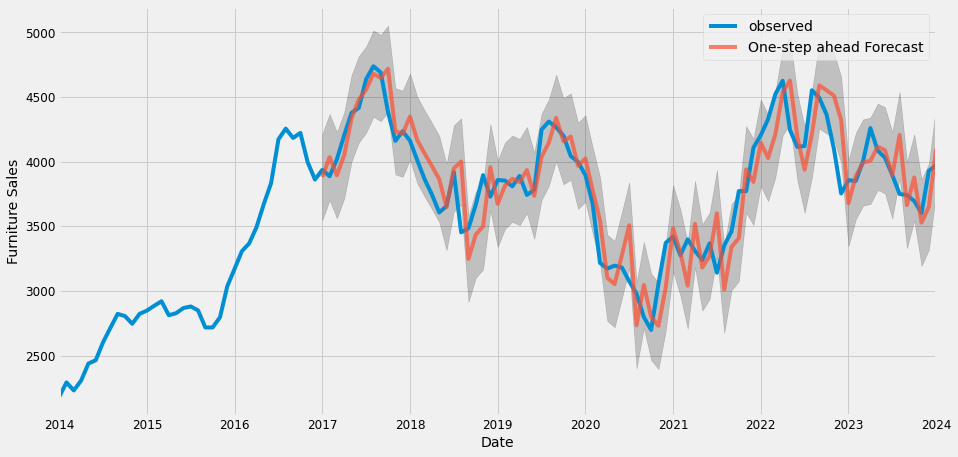

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 49145.18


In [23]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 221.69


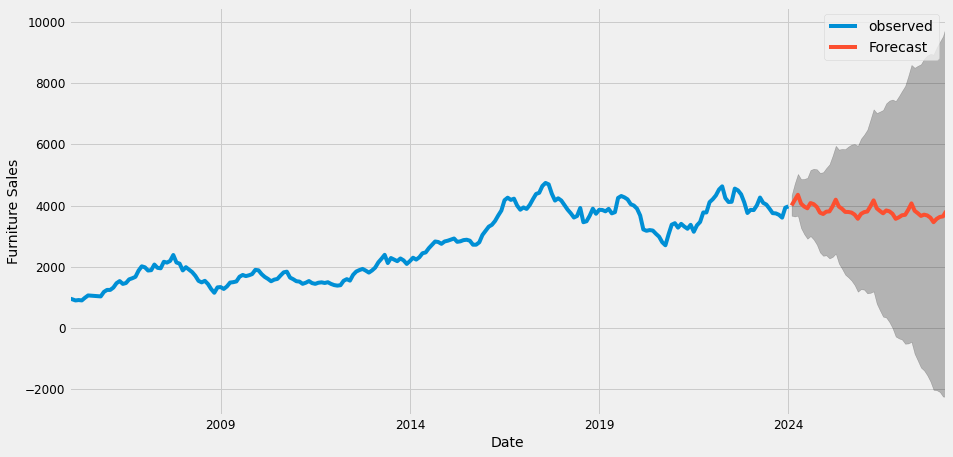

In [24]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()